In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")

# Load the JSON data from your file
with open('course_data_full.json', 'r') as f:
    data = json.load(f)

# Convert the dictionary of courses into a Pandas DataFrame
# 'orient="index"' makes the dictionary keys (course codes) the DataFrame index
courses_df = pd.DataFrame.from_dict(data, orient='index')

# Display the first 5 rows to see the structure
print("First 5 rows of the dataset:")
display(courses_df.head())

# Display the shape of the DataFrame (rows, columns)
print(f"\nDataset shape: {courses_df.shape[0]} courses and {courses_df.shape[1]} features.")

First 5 rows of the dataset:


,Ceus,CourseRequisites,CourseTitleDisplay,CreditsCeusDisplay,CreditsDisplayLabel,Description,EquatedCourseIds,FullTitleDisplay,HasSections,Id,...,ShowDropRoster,SubjectCode,TermSessionCycle,TermYearlyCycle,TermsAndSections,TermsOffered,Title,VariableCreditIncrement,VerifyGrades,YearsOffered
ACCT*330,None,[{'DisplayText': 'Student must have completed ...,ACCT*330,3,Credits,(3 credits)(Prereq: A grade of 'C' or better i...,None,ACCT*330 Intermediate Accounting I,True,5063,...,False,ACCT,FS,ALL,[],Fall/Spring,Intermediate Accounting I,NaN,None,All Years
ACCT*331,None,[{'DisplayText': 'Student must have completed ...,ACCT*331,3,Credits,(3 credits)(Prereq: A grade of 'C' or better i...,None,ACCT*331 Intermediate Accounting II,True,5064,...,False,ACCT,FSS,ALL,[],Fall/Spring/Summer,Intermediate Accounting II,NaN,None,All Years
ACCT*332,None,[{'DisplayText': 'Student must have completed ...,ACCT*332,3,Credits,(3 credits)(Prereq: A grade of 'C' or better i...,None,ACCT*332 Intermediate Accounting III,True,5065,...,False,ACCT,FSS,ALL,[],Fall/Spring/Summer,Intermediate Accounting III,NaN,None,All Years
ACCT*333,None,[{'DisplayText': 'Student must have completed ...,ACCT*333,3,Credits,(3 credits)(Prereq: A grade of 'C' or better i...,None,ACCT*333 Cost Accounting,True,5066,...,False,ACCT,FSS,ALL,[],Fall/Spring/Summer,Cost Accounting,NaN,None,All Years
ACCT*336,None,[{'DisplayText': 'Students must have completed...,ACCT*336,3,Credits,(3 credits)(Prereq: A grade of 'C' or better i...,None,ACCT*336 Accounting Systems & Analytics,True,10881,...,False,ACCT,FS,ALL,[],Fall/Spring,Accounting Systems & Analytics,NaN,None,All Years



Dataset shape: 3043 courses and 31 features.


In [3]:
# Get a concise summary of the DataFrame
print("DataFrame Info:")
courses_df.info()

# Check for duplicate course codes (index)
duplicate_codes = courses_df.index.duplicated().sum()
print(f"\nNumber of duplicate course codes (index): {duplicate_codes}")

# Check for duplicate internal IDs
# We drop rows where 'Id' is missing to avoid counting them as duplicates
duplicate_ids = courses_df['Id'].dropna().duplicated().sum()
print(f"Number of duplicate internal course Ids: {duplicate_ids}")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3043 entries, ACCT*330 to WGST*795
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Ceus                                  0 non-null      object 
 1   CourseRequisites                      3043 non-null   object 
 2   CourseTitleDisplay                    3043 non-null   object 
 3   CreditsCeusDisplay                    3043 non-null   object 
 4   CreditsDisplayLabel                   3043 non-null   object 
 5   Description                           3043 non-null   object 
 6   EquatedCourseIds                      0 non-null      object 
 7   FullTitleDisplay                      3043 non-null   object 
 8   HasSections                           3043 non-null   bool   
 9   Id                                    3043 non-null   object 
 10  IsPseudoCourse                        3043 non-null   bool   


Summary statistics for course credits:


count    2799.000000
mean        2.713469
std         0.897977
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max        12.000000
Name: Credits, dtype: float64

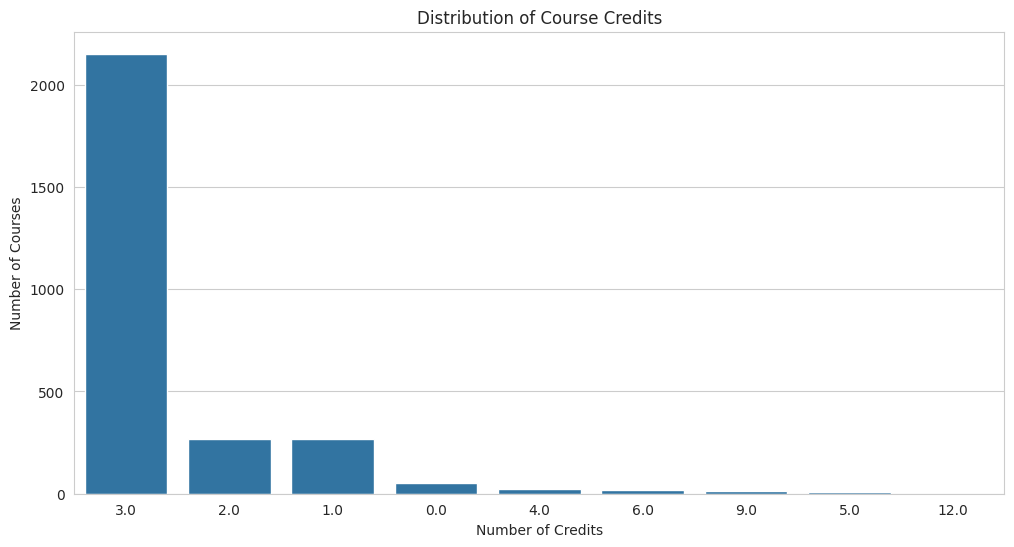

In [4]:
# Convert 'CreditsCeusDisplay' to a numeric type for analysis
# 'errors="coerce"' will turn any non-numeric values into NaN (Not a Number)
courses_df['Credits'] = pd.to_numeric(courses_df['CreditsCeusDisplay'], errors='coerce')

# Display summary statistics for the 'Credits' column
print("Summary statistics for course credits:")
display(courses_df['Credits'].describe())

# Visualize the distribution of credits
plt.figure(figsize=(12, 6))
sns.countplot(x='Credits', data=courses_df, order=courses_df['Credits'].value_counts().index)
plt.title('Distribution of Course Credits')
plt.xlabel('Number of Credits')
plt.ylabel('Number of Courses')
plt.show()

Top 20 Subjects by Course Count:


SubjectCode
MUS     325
HIST    125
MSCI    101
THEA     95
BIOL     87
POLI     86
ENGL     82
COMM     72
CSCI     63
ARTS     61
SOC      55
MATH     54
SPAN     53
PSYC     50
CMWS     50
CHEM     47
UNIV     47
ARTH     44
EDSP     44
PHYS     43
Name: count, dtype: int64

/tmp/ipykernel_14098/3155666997.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_subjects.index, x=top_subjects.values, palette='viridis')


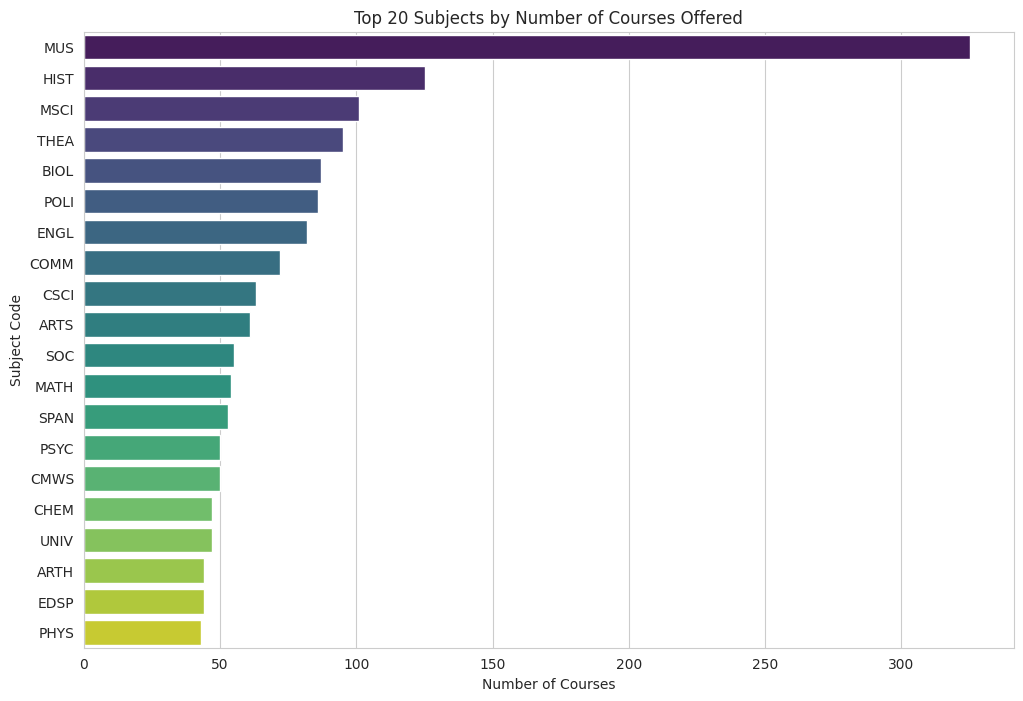

In [5]:
# Analyze the top 20 subjects by number of courses offered
top_subjects = courses_df['SubjectCode'].value_counts().nlargest(20)

print("Top 20 Subjects by Course Count:")
display(top_subjects)

# Visualize the top subjects
plt.figure(figsize=(12, 8))
sns.barplot(y=top_subjects.index, x=top_subjects.values, palette='viridis')
plt.title('Top 20 Subjects by Number of Courses Offered')
plt.xlabel('Number of Courses')
plt.ylabel('Subject Code')
plt.show()

In [6]:
# Create a new column for the number of requisites
# The data is a list of dicts, so we can use its length
courses_df['NumRequisites'] = courses_df['CourseRequisites'].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)

# Create a column that joins all requisite display texts for a course
courses_df['RequisiteText'] = courses_df['CourseRequisites'].apply(
    lambda req_list: ' | '.join([req['DisplayText'] for req in req_list]) if isinstance(req_list, list) and req_list else ''
)

print("Distribution of the number of requisites per course:")
display(courses_df['NumRequisites'].value_counts().sort_index())

print("\nExample of extracted requisite text:")
display(courses_df[['FullTitleDisplay', 'RequisiteText']].head())

Distribution of the number of requisites per course:


NumRequisites
0    1449
1    1387
2     196
3       9
4       2
Name: count, dtype: int64


Example of extracted requisite text:


,FullTitleDisplay,RequisiteText
ACCT*330,ACCT*330 Intermediate Accounting I,Student must have completed CBAD 201 and CBAD ...
ACCT*331,ACCT*331 Intermediate Accounting II,Student must have completed ACCT 330 with a mi...
ACCT*332,ACCT*332 Intermediate Accounting III,Student must have completed ACCT 331 with a mi...
ACCT*333,ACCT*333 Cost Accounting,Student must have completed CBAD 202 with a mi...
ACCT*336,ACCT*336 Accounting Systems & Analytics,Students must have completed CBAD*201 and CBAD...


In [8]:
import re

def extract_prereq_codes(text):
    """
    Uses a regular expression to find all course codes in a string.
    The pattern looks for 4 uppercase letters, an optional space, and 3 digits.
    """
    if not isinstance(text, str):
        return []
    
    # Pattern: 4 letters (like ACCT), optional space, 3 digits (like 330)
    pattern = r'[A-Z]{4}\s?\d{3}'
    
    # Find all non-overlapping matches in the string
    matches = re.findall(pattern, text)
    
    # Standardize format by removing spaces (e.g., "CBAD 201" -> "CBAD201")
    return [match.replace(' ', '') for match in matches]

# Apply the function to the 'RequisiteText' column
courses_df['PrereqCodes'] = courses_df['RequisiteText'].apply(extract_prereq_codes)

# Display the results to verify the extraction
print("Extracted Prerequisite Codes:")
display(courses_df[courses_df['NumRequisites'] > 0][['FullTitleDisplay', 'RequisiteText', 'PrereqCodes']].head())

Extracted Prerequisite Codes:


,FullTitleDisplay,RequisiteText,PrereqCodes
ACCT*330,ACCT*330 Intermediate Accounting I,Student must have completed CBAD 201 and CBAD ...,"[CBAD201, CBAD202]"
ACCT*331,ACCT*331 Intermediate Accounting II,Student must have completed ACCT 330 with a mi...,[ACCT330]
ACCT*332,ACCT*332 Intermediate Accounting III,Student must have completed ACCT 331 with a mi...,[ACCT331]
ACCT*333,ACCT*333 Cost Accounting,Student must have completed CBAD 202 with a mi...,[CBAD202]
ACCT*336,ACCT*336 Accounting Systems & Analytics,Students must have completed CBAD*201 and CBAD...,[]


Top 20 Most Common Prerequisite Courses:


PrereqCodes
MATH161    33
MATH160    31
PSYC101    26
POLI201    26
POLI101    22
ENGL101    22
MATH130    21
BIOL122    15
ENGL102    15
MSCI302    15
BIOL350    14
CBAD301    14
MATH131    13
MATH135    12
MATH132    12
PHYS212    11
ECON201    11
ECON101    11
BIOL112    11
CHEM112    11
Name: count, dtype: int64

/tmp/ipykernel_14098/543740042.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=most_common_prereqs.index, x=most_common_prereqs.values, palette='plasma')


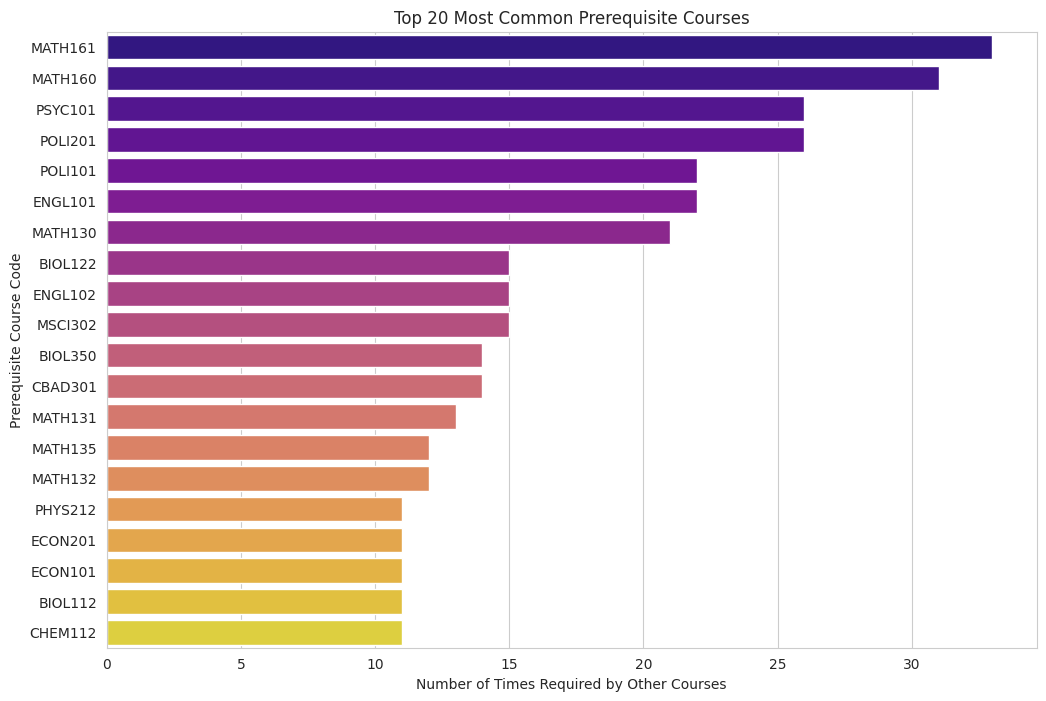

In [9]:
# Create a new DataFrame by "exploding" the PrereqCodes list.
# This creates a new row for each prerequisite in the list.
prereq_counts = courses_df['PrereqCodes'].explode().dropna()

# Calculate the value counts to see the most common prerequisites
most_common_prereqs = prereq_counts.value_counts().nlargest(20)

print("Top 20 Most Common Prerequisite Courses:")
display(most_common_prereqs)

# Visualize the most common prerequisites
plt.figure(figsize=(12, 8))
sns.barplot(y=most_common_prereqs.index, x=most_common_prereqs.values, palette='plasma')
plt.title('Top 20 Most Common Prerequisite Courses')
plt.xlabel('Number of Times Required by Other Courses')
plt.ylabel('Prerequisite Course Code')
plt.show()

In [18]:
import re

def parse_requisites_from_list(req_list):
    """
    Parses the 'CourseRequisites' list to create a structured prereq object.
    """
    # Step 1: Check if the input is a valid list and not empty.
    if not isinstance(req_list, list) or not req_list:
        return {}

    # Step 2: Combine the 'DisplayText' from each dictionary in the list into one string.
    # We join them with ' and ' in case a course has multiple separate requisite rules.
    full_req_text = ' and '.join([req.get('DisplayText', '') for req in req_list])

    if not full_req_text:
        return {}

    # Step 3: Find all course codes in the combined text.
    # This pattern finds 4 letters, an optional asterisk or space, and 3 digits.
    course_pattern = r'[A-Z]{4}[\*\s]?\d{3}'
    courses_found = re.findall(course_pattern, full_req_text, re.IGNORECASE)
    
    # Standardize course codes to a 'SUBJECT###' format (e.g., 'ACCT330')
    courses = [re.sub(r'[\s\*]', '', code).upper() for code in courses_found]

    if not courses:
        return {}

    # Step 4: Determine the logical relationship ('and'/'or').
    if len(courses) == 1:
        logic_type = 'and'
    else:
        if ' or ' in full_req_text.lower():
            logic_type = 'or'
        else:
            logic_type = 'and'

    return {
        "type": logic_type,
        "courses": courses
    }

# Apply this new, more accurate function to the 'CourseRequisites' column
courses_df['StructuredPrereqs'] = courses_df['CourseRequisites'].apply(parse_requisites_from_list)

# Display the results for courses that have prerequisites
print("Structured Prerequisites from 'CourseRequisites' Field:")
display(courses_df[courses_df['StructuredPrereqs'].astype(bool)][['FullTitleDisplay', 'StructuredPrereqs']].head(10))

Structured Prerequisites from 'CourseRequisites' Field:


,FullTitleDisplay,StructuredPrereqs
ACCT*330,ACCT*330 Intermediate Accounting I,"{'type': 'and', 'courses': ['CBAD201', 'CBAD20..."
ACCT*331,ACCT*331 Intermediate Accounting II,"{'type': 'and', 'courses': ['ACCT330']}"
ACCT*332,ACCT*332 Intermediate Accounting III,"{'type': 'and', 'courses': ['ACCT331']}"
ACCT*333,ACCT*333 Cost Accounting,"{'type': 'and', 'courses': ['CBAD202']}"
ACCT*336,ACCT*336 Accounting Systems & Analytics,"{'type': 'or', 'courses': ['CBAD201', 'CBAD292']}"
ACCT*339,ACCT*339 Individual Income Taxation,"{'type': 'or', 'courses': ['CBAD201', 'CBAD202']}"
ACCT*434,ACCT*434 Controllership,"{'type': 'and', 'courses': ['ACCT333']}"
ACCT*437,ACCT*437 Auditing Theory,"{'type': 'or', 'courses': ['CBAD291', 'ACCT333..."
ACCT*439,ACCT*439 Income Taxation Bus. Entities,"{'type': 'and', 'courses': ['ACCT339']}"
ACCT*441,ACCT*441 Voluntary Income Tax Assistnce,"{'type': 'and', 'courses': ['ACCT339']}"


In [20]:
import re
import json

def parse_final_prerequisites(req_list):
    """
    A more robust parser that handles lab suffixes, non-specific requirements,
    and redundant data entries with a corrected, more precise regex.
    """
    if not isinstance(req_list, list) or not req_list:
        return {}

    unique_texts = list(set([req.get('DisplayText', '') for req in req_list]))
    full_req_text = ' and '.join(filter(None, unique_texts))
    
    if not full_req_text:
        return {}

    # THE FIX: This regex is now much more specific and uses word boundaries (\b).
    course_pattern = r'\b[A-Z]{4}\*?\s?\d{3}[\w/]*\b'
    courses_found = re.findall(course_pattern, full_req_text, re.IGNORECASE)
    
    courses = [re.sub(r'[\s\*]', '', code).upper() for code in courses_found]

    if not courses:
        return {
            "type": "other",
            "description": full_req_text
        }

    clean_text = full_req_text.replace(',', '').split(' all with a minimum grade')[0]
    structured_rule = {'type': 'and', 'courses': []}
    and_conditions = [part.strip() for part in clean_text.split(' and ')]
    
    for condition in and_conditions:
        if ' or ' in condition:
            or_courses = [re.sub(r'[\s\*]', '', c).upper() for c in re.findall(course_pattern, condition, re.IGNORECASE)]
            if or_courses:
                structured_rule['courses'].append({'type': 'or', 'courses': or_courses})
        else:
            single_courses = [re.sub(r'[\s\*]', '', c).upper() for c in re.findall(course_pattern, condition, re.IGNORECASE)]
            structured_rule['courses'].extend(single_courses)
            
    return structured_rule

# --- Apply the final, corrected parser to the entire DataFrame ---
courses_df['StructuredPrereqs'] = courses_df['CourseRequisites'].apply(parse_final_prerequisites)


# --- Re-run the tests against the pitfall cases ---
print("--- Testing Pitfall Cases with Corrected Regex ---")

# Test CSCI*310
csci310_req = courses_df.loc['CSCI*310', 'StructuredPrereqs']
print("\nCSCI*310 (Expected Correct Output):")
print(json.dumps(csci310_req, indent=2))

# Test CSCI*335
csci335_req = courses_df.loc['CSCI*335', 'StructuredPrereqs']
print("\nCSCI*335 (Expected Correct Output):")
print(json.dumps(csci335_req, indent=2))

# Test CSCI*445
csci445_req = courses_df.loc['CSCI*445', 'StructuredPrereqs']
print("\nCSCI*445 (Expected Correct Output):")
print(json.dumps(csci445_req, indent=2))

--- Testing Pitfall Cases with Corrected Regex ---

CSCI*310 (Expected Correct Output):
{
  "type": "and",
  "courses": [
    {
      "type": "or",
      "courses": [
        "CSCI145",
        "CSCI150/L"
      ]
    },
    "CSCI210",
    {
      "type": "or",
      "courses": [
        "MATH174"
      ]
    },
    {
      "type": "or",
      "courses": [
        "CSCI145",
        "CSCI150/L"
      ]
    },
    "CSCI210",
    {
      "type": "or",
      "courses": [
        "MATH174"
      ]
    }
  ]
}

CSCI*335 (Expected Correct Output):
{
  "type": "other",
  "description": "Take 12 hours of CSCI courses numbered 120 or above with a minumum grade of C"
}

CSCI*445 (Expected Correct Output):
{
  "type": "and",
  "courses": [
    {
      "type": "or",
      "courses": [
        "CSCI145",
        "CSCI150/L"
      ]
    },
    {
      "type": "or",
      "courses": [
        "MATH160",
        "MATH160B",
        "MATH242/L"
      ]
    }
  ]
}


Summary statistics for description length:


count    3043.000000
mean      354.191259
std       220.757283
min         0.000000
25%       212.500000
50%       341.000000
75%       480.000000
max      1877.000000
Name: DescriptionLength, dtype: float64

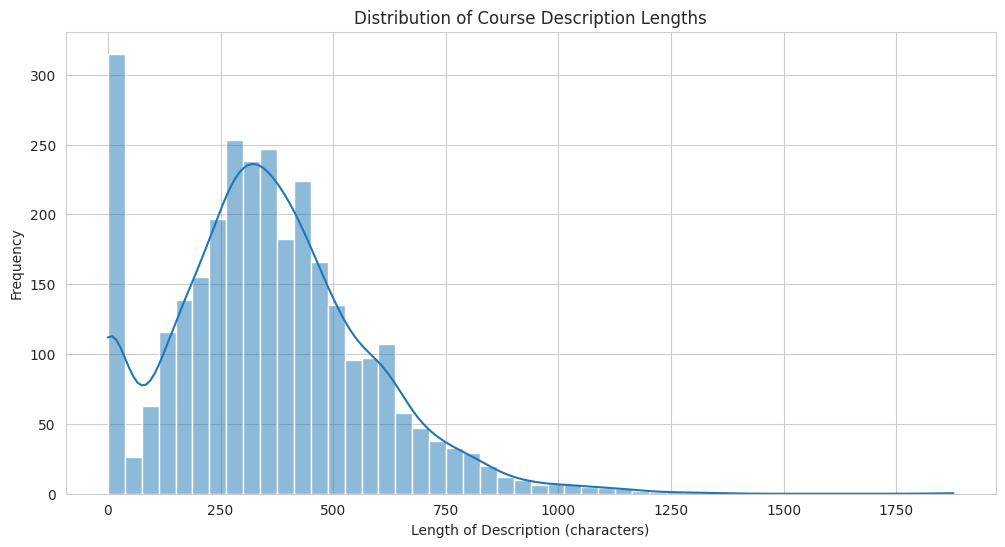

In [7]:
# Calculate the length of each course description
courses_df['DescriptionLength'] = courses_df['Description'].str.len()

print("Summary statistics for description length:")
display(courses_df['DescriptionLength'].describe())

# Visualize the distribution of description lengths
plt.figure(figsize=(12, 6))
sns.histplot(courses_df['DescriptionLength'], bins=50, kde=True)
plt.title('Distribution of Course Description Lengths')
plt.xlabel('Length of Description (characters)')
plt.ylabel('Frequency')
plt.show()